# **Presentación**


## **Tecnicatura Universitaria en Inteligencia Artificial**
### *Trabajo Práctico Integrador*
### ***Aprendizaje Automatico 1***
---

**Equipo**:
- Ferrucci Constantino
- Giampaoli Fabio

<br>

**Fechas de entrega**:
- 27/10/2023 (segunda entrega hasta item 4)


---

## **Resumen**


Esta es la segunda parte del proyecto de la asignatura Aprendizaje Automatico 1. Puede consultar la parte 1 del mismo en el repositorio de [github](https://github.com/Shannon-21/Aprendizaje_Automatico_1.git), o bien el siguiente [notebook de Google Colab](https://colab.research.google.com/drive/1P32i9TmMZgLiKAblI0vKwltg7GMwnqvw?usp=sharing).\
<br>

La primera parte consiste en la limpieza del dataset ofrecido y obtencion de predicciones y metricas de las mismas sobre la cantidad de lluvia en las ciudades de Australia elegidas para el dia posterior al ingresado.\
<br>

El dataset elegido consiste de variables meteorologicas de Australia en determinado periodo de tiempo que seran de interes para la predicion de la presencia de lluvia en algun dia con ciertas caracteristicas mediante modelos estudiados en el cursado de la materia.\
<br>

En esta etapa del trabajo practico, es de principal interes el analisis y tratamiento del conjunto de datos para conocer el contexto sobre el cual vamos a desarrollarnos y entender como las variables explicativas afectan a nuestra variable de interes: 'RainTomorrow', que es una varible binaria. Luego realizar predicciones utilizando modelos de regresion logistica con diferentes caracteristicas, y comparar cual tiene mejor comportameinto a la hora de predecir la presencia de lluvia para el dia siguiente dada ciertas condiciones del dia previo.\
<br>

# **Entorno**

Me gustaria meter aca directamente el dasaset preprocesado por la parte una del tp (hacer un csv del limpio y cargarlo directo aca). Pero tambien cargar distintas variantes del mismo, ya que la interpretacion del mismo puede diferir al tener todas variable snumiercas estandar (no saber a que ciudad se corresponde un numero, por ejemplo)

Yo cargaria el limpio final, y otro no estandarizado ni codificado ni reducido en clases, pero si imputado.

Este segundo mas con el fin de comparaciones de si las logistas van mejor con o sin codificaciones, y demas.

### Librerias

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact, Dropdown
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE


### Datos

In [ ]:
df = pd.read_csv('weatherAUS_cleaned.csv', usecols=lambda x: x if x != 'Unnamed: 0' else None)

display(df)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow,Month,Season,lat,lon
0,1.000000,0.702994,0.599033,0.130653,0.260504,0.000000,0.943804,0.300000,0.668694,1.000000,...,1.000,0.571429,0.405660,1.0,1.0,0.050251,0.000000,0.000000,1.0,1.0
1,1.000000,0.714654,0.527430,0.050251,0.142857,0.194245,1.000000,0.235135,0.689550,0.000000,...,0.875,0.615584,0.497642,1.0,1.0,0.055276,0.000000,0.000000,1.0,1.0
2,1.000000,0.725457,0.486185,0.055276,0.100840,0.007194,0.943804,0.266667,0.000000,0.000000,...,1.000,0.644156,0.455189,1.0,1.0,0.157454,0.000000,0.000000,1.0,1.0
3,1.000000,0.733259,0.505852,0.157454,0.092437,0.000000,0.000000,0.408108,1.000000,0.000000,...,1.000,0.589610,0.405660,1.0,1.0,0.648241,0.000000,0.000000,1.0,1.0
4,1.000000,0.732269,0.458073,0.648241,0.218487,0.000000,0.943804,0.275676,1.000000,0.011871,...,1.000,0.618182,0.514151,1.0,1.0,0.013400,0.000000,0.000000,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15194,0.692781,0.251174,0.202031,0.000000,0.100840,0.633094,1.000000,0.252252,1.000000,0.835252,...,0.875,0.238961,0.280660,0.0,0.0,0.005025,0.704467,0.719512,0.0,0.0
15195,0.692781,0.256116,0.185821,0.005025,0.025210,0.000000,1.000000,0.117117,0.689550,1.000000,...,0.875,0.324675,0.212264,0.0,0.0,0.001675,0.704467,0.719512,0.0,0.0
15196,0.692781,0.245118,0.200161,0.001675,0.025210,0.000000,1.000000,0.117117,1.000000,0.835252,...,0.875,0.228571,0.231132,0.0,0.0,0.000000,0.704467,0.719512,0.0,0.0
15197,0.692781,0.203886,0.190592,0.000000,0.067227,0.431655,1.000000,0.297297,1.000000,0.835252,...,0.875,0.270130,0.207547,0.0,1.0,0.011725,0.704467,0.719512,0.0,0.0


# **Analisis Descriptivo**

Si bien esto ya estaba hecho, me gustaria enfocarlo ahora un poco mas en balances de clases, estudiar el comportamiento de presencia de lluvia con respecto a las otras variables, etc.

### Analisis

In [ ]:
def remove_index(df):
    df = df.copy()
    if 'Unnamed: 0' in df.columns:
        df_c = df.drop(df[['Unnamed: 0']], axis=1)

    return df_c

df_curated = remove_index(df)
df_curated.head(1)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow,Month,Season,lat,lon
0,1.0,0.702994,0.599033,0.130653,0.260504,0.0,0.943804,0.3,0.668694,1.0,...,1.0,0.571429,0.40566,1.0,1.0,0.050251,0.0,0.0,1.0,1.0


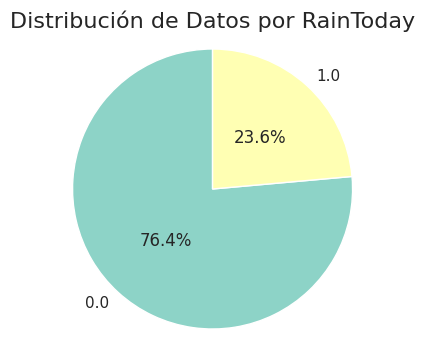

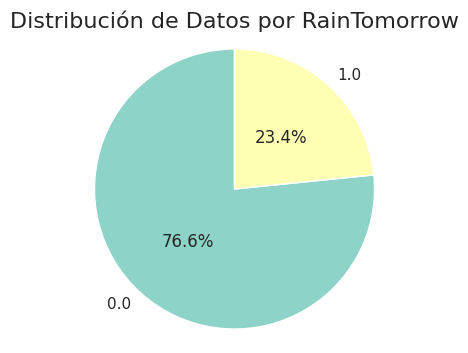

In [ ]:
def graficar_proporcion_datos(df, column):
    value_counts = df[column].value_counts()

    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=(5, 4))

    ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, pctdistance=0.5, colors=sns.color_palette('Set3'))

    plt.title(f'Distribución de Datos por {column}', fontsize=16)
    plt.axis('equal')

    plt.show()

graficar_proporcion_datos(df_curated, 'RainToday')
graficar_proporcion_datos(df_curated, 'RainTomorrow')

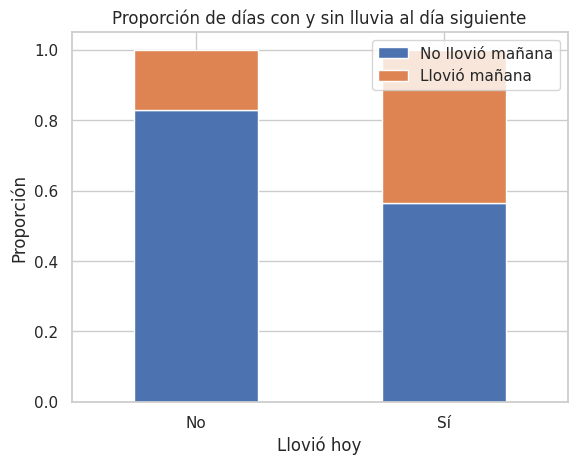

In [ ]:
# Crear una tabla de contingencia
contingency_table = pd.crosstab(df_curated['RainToday'], df_curated['RainTomorrow'])

# Calcular las proporciones
proportions = contingency_table.div(contingency_table.sum(axis=1), axis=0)

# Crear el gráfico de barras
proportions.plot(kind='bar', stacked=True)

plt.title('Proporción de días con y sin lluvia al día siguiente')
plt.xlabel('Llovió hoy')
plt.ylabel('Proporción')
plt.xticks([0, 1], ['No', 'Sí'], rotation=0)
plt.legend(['No llovió mañana', 'Llovió mañana'])

plt.show()

In [ ]:
def create_plots(df, explanatory_var, binary_var):
    fig, axs = plt.subplots(3, 1, figsize=(6,6))

    sns.stripplot(x=explanatory_var, y=[""]*len(df), hue=binary_var, data=df, jitter=True, ax=axs[0])
    axs[0].set_title('Distribución de ' + explanatory_var + ' con respecto a ' + binary_var)
    axs[0].legend('')
    axs[0].set_xlabel("")

    sns.boxplot(y=binary_var, x=explanatory_var, data=df, orient='h', ax=axs[1])
    axs[1].legend('')
    axs[1].set_xlabel("")

    sns.kdeplot(data=df, x=explanatory_var, hue=binary_var, fill=True, ax=axs[2])
    axs[2].set_xlabel(explanatory_var)
    axs[2].legend('')

    plt.tight_layout()
    plt.show()

# Crear los widgets
explanatory_var_widget = widgets.Dropdown(
    options=[col for col in df_curated.columns if col not in ['RainToday', 'RainTomorrow', 'Location', 'lat', 'lon', 'Month', 'Season']],
    value='Sunshine',  # Valor predeterminado
    description='Explicativa:',
)

binary_var_widget = widgets.Dropdown(
    options=['RainToday', 'RainTomorrow'],
    value='RainTomorrow',  # Valor predeterminado
    description='Binaria:',
)

# Usar interact para crear la interactividad
interact(create_plots, df=widgets.fixed(df_curated), explanatory_var=explanatory_var_widget, binary_var=binary_var_widget)

interactive(children=(Dropdown(description='Explicativa:', index=4, options=('MinTemp', 'MaxTemp', 'Rainfall',…

<function __main__.create_plots(df, explanatory_var, binary_var)>

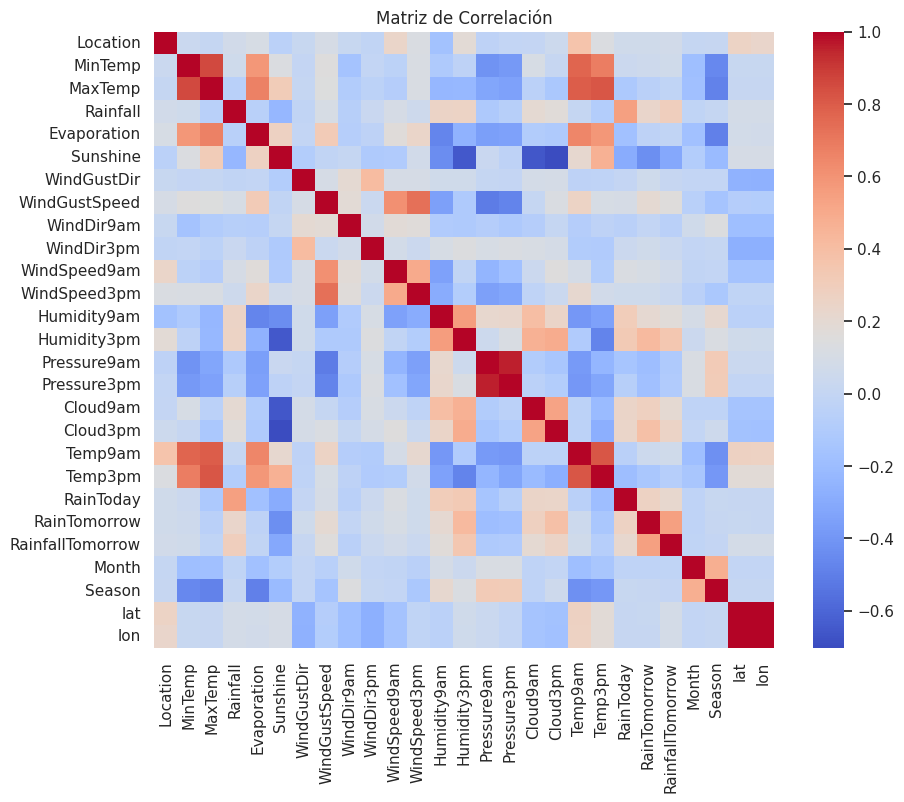

In [ ]:
# Calcular la matriz de correlación
corr_matrix = df_curated.corr()

# Crear un mapa de calor con la matriz de correlación
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlación')
plt.show()


# **Procesamiento**

Si nos encontramos desbalances, o transformaciones que resultan ventajosas para la clasificacion, podemos agregarlo aca

In [ ]:
def base_model_regressor(df):
    # Separar las variables explicativas y la variable objetivo
    X = df.drop(columns=['RainTomorrow'], axis=1)
    y = df['RainTomorrow']

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    y_pred = X_test['RainfallTomorrow'].apply(lambda x: 1 if x > 0.008 else 0)
    display(y_pred)

    # Calcular las métricas de clasificación
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Imprimir las métricas
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')


# Llamada a la función
base_model_regressor(df_curated)

3165     1
3691     0
3297     0
10409    1
7934     0
        ..
12402    0
4464     1
10622    0
12955    0
8908     0
Name: RainfallTomorrow, Length: 3040, dtype: int64

Accuracy: 0.9881578947368421
Precision: 0.9512195121951219
Recall: 1.0
F1 Score: 0.975


In [ ]:
df_curated['RainfallTomorrow']

0        0.050251
1        0.055276
2        0.157454
3        0.648241
4        0.013400
           ...   
15194    0.005025
15195    0.001675
15196    0.000000
15197    0.011725
15198    0.000000
Name: RainfallTomorrow, Length: 15199, dtype: float64

In [ ]:

def balance_classes(df, target_var):
    # Separar las variables explicativas y la variable objetivo
    X = df.drop(target_var, axis=1)
    y = df[target_var]

    # Crear el objeto SMOTE
    smote = SMOTE(random_state=42)

    # Aplicar SMOTE a los datos
    X_res, y_res = smote.fit_resample(X, y)

    # Devolver el DataFrame balanceado
    return pd.concat([X_res, y_res], axis=1)

# Llamada a la función
df_balanced = balance_classes(df_curated, 'RainTomorrow')

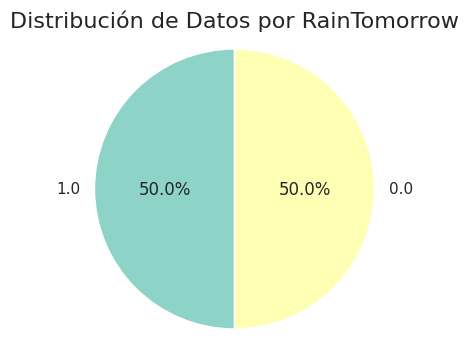

Accuracy: 0.9096178617432374
Precision: 0.9413902771467515
Recall: 0.8764805414551607
F1 Score: 0.907776560788609


In [ ]:
graficar_proporcion_datos(df_balanced, 'RainTomorrow')
base_logistic_regressor(df_balanced)

In [ ]:
base_logistic_regressor(df_curated, {0.0:1, 1.0:3})

Accuracy: 0.9161184210526315
Precision: 0.8016194331983806
Recall: 0.8461538461538461
F1 Score: 0.8232848232848233


In [ ]:
def get_correlation_with_variable(df, column): # para obtener correlaciones con la variable objetivo
  correlation_matrix = df.corrwith(df[column])
  correlation_matrix = correlation_matrix.to_frame(name='correlation')
  correlation_matrix = correlation_matrix.abs()
  sorted_correlation_matrix = correlation_matrix.sort_values(by='correlation', ascending=False)

  return sorted_correlation_matrix

def get_important_variables(df, umbral): # filtrar aquellas variables que superen un umbral de correlacion minima
  df_copy = df.copy()
  df_copy = df_copy[df_copy['correlation'] > umbral]

  variables = df_copy.index

  return list(reversed(variables))


correlation_with_raintomorrow = get_correlation_with_variable(df_curated, 'RainTomorrow')
variables_most_important = get_important_variables(correlation_with_raintomorrow, 0.2)

correlation_with_raintomorrow.head(10)

tino = df_curated[variables_most_important]
base_logistic_regressor(tino)



Accuracy: 0.8391447368421052
Precision: 0.7320261437908496
Recall: 0.47863247863247865
F1 Score: 0.578811369509044


# **Predecciones**

Cuando consideremos que ya el dataset esta en su mejor forma, definimos y jugamos con los modelos

### Modelos

In [ ]:
def base_logistic_regressor(df, weights=None):
    # Separar las variables explicativas y la variable objetivo
    X = df.drop(columns=['RainTomorrow'], axis=1)
    y = df['RainTomorrow']

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Crear y entrenar el modelo de regresión logística
    model = LogisticRegression(class_weight=weights, max_iter=1000)
    model.fit(X_train, y_train)

    # Hacer predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular las métricas de clasificación
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Imprimir las métricas
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')


### Interpretaciones

Aca vamos a tener que meter toda la parte de explicabilidad para ver las poderaciones y cpmportamiento de los modelos a la hora de predecir y entrenar

# **Conclusiones**

Concluciones de mejores predicciones y los modelos